<a href="https://colab.research.google.com/github/hquint/Quant/blob/master/SP_IBOV_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Você sabe como o S&P e a IBOVESPA se comportam antes e depois das eleições para presidente dos EUA?

Chegando perto de mais uma eleição para presidente dos EUA, os investidores pessoa física ficam na dúvida do que fazer com o capital investido durante esse período. Intuitivamente, o pensamento é que devemos nos proteger em um período tão volátil como esse, certo? Se sim, e com base nas últimas eleições, quando devemos começar a nos preocupar? 

Separei para analisarmos as últimas três eleições onde tivemos mudança de partido no poder em relação ao ano anterior:

1. Em 2000, os republicanos retornaram ao poder após dois anos de mandato do democrata Bill Clinton com a vitória de George W. Bush, que levou a melhor contra Al Gore (Aquecimento Global).
2. Em 2008, após dois anos de mandato de Bush, Barack Obama venceu as eleições contra o republicano John McCain, retornando a governança do país para as mãos dos democratas. 
3. Por último, em 2016, o atual presidente Donald Trump colocou os republicanos de volta no poder ao vencer a então favorita Hillary Clinton, em uma das maiores surpresas (para a mídia) das últimas eleições.

Durante essas trocas de partidos no poder, como será que a bolsa americana (S&P 500) e a bolsa brasileira (Ibovespa) performaram nos meses anteriores e imediatamente após as eleições? Preparei um simples código em Python para compararmos as duas bolsas e o resultado pode ser visto abaixo:



# Código

In [ ]:
# First let's start importing some libraries and pip install the yahoo finance 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

!pip install yfinance 
import yfinance as yf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=4f4379121bad4ad51da9467295c6ff78a5b3423d1b9d0ea861e49074a9465484
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
# Defining a function to extract the data and plot the curves together with the 
# correlation of that time period. You just need to run this cell, 
# no need to change anything else.

def plot_data(year):

  # Getting the election day 
  if year == '1996':
    day   = 5;
  if year == '2000':
    day = 7;
  elif year == '2004':
    day = 2;
  elif year == '2008':
    day = 4;
  elif year == '2012':
    day = 6;
  elif year == '2016':
    day = 8;
  elif year == '2020':
    day = 3;
  
  # define a delta to shift the 'election day' text in the plot
  delta = 15;


  # Let's define the tickers (the index to import) and the time (between first 
  # of August, ie 3 months before the election until the end of the year.)
  # Remember that the Americans election are held always on Tuesday after the
  # first Monday of November. In other words, it can be the earliest on November,
  # 2nd or the latest on November 8th.

  tickers=['^BVSP','^GSPC']
  data = yf.download(tickers, start=year+'-08-01', end=year+'-12-31')['Close']

  # Improving columns name (not necessary)
  data.columns=['IBOV','SP'];

  # Since the database usually presents missing data, there are different ways 
  # to deal with this issue. In this case, we choose to interpolate the data to 
  # obtain the missing values, without losing generality.
  data=data.interpolate(method='polynomial', order=2);

  # Plotting the IBOV and SP500 data in the same graph, highlighting the election day.
  fig = make_subplots(specs=[[{"secondary_y": True}]])


  fig.add_trace( 
      go.Scatter(name='IBOV',x=data.index, y=data.IBOV, 
                 mode="lines+markers", marker=dict(size=5, color="Darkgreen")),
      secondary_y=False,
                )

  fig.add_scatter(name='S&P500', x=data.index, y=data.SP,
                  mode="lines+markers", marker=dict(size=5, color="Mediumblue"),
      secondary_y=True,
                 )

  # Create scatter trace of text labels
  fig.add_trace(go.Scatter(
      x=[year+"-11-"+str(day+delta)],
      y=[data["IBOV"].max()],
      text=["<b>Election day</b>"],
      mode="text",
      showlegend=False
  ))



  # Add shapes
  fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            xref="x",
            yref="paper",
            x0=year+"-11-"+str(day),
            y0=0,
            x1=year+"-11-"+str(day),
            y1=1,
            line=dict(
                color="Red",
                width=3,
                dash="dot"
            )
  ))


  fig.update_layout(
     title_text="<b>US presidential election</b>", 
     title_x=0.5
    )

  fig.update_xaxes(title_text="<b>Day</b>")
  fig.update_yaxes(title_text="<b>IBOVESPA</b> ", secondary_y=False, color="Darkgreen")
  fig.update_yaxes(title_text="<b>S&P 500</b> ", secondary_y=True, color="Mediumblue")
  #fig.update_layout(legend=dict(x=0.01, y=0.95))
  fig.update_layout(showlegend=False,width=700,height=500)


  #Plotando a correlacao
  ax = plt.axes()
  sns.heatmap(data.corr(), annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, 
              linewidths=.5, linecolor='Black', cbar_kws={"shrink": .5},
              annot_kws={"color": "Black","weight": "bold"})
  ax.set_title("Correlation IBOV x SP in "+year, weight='bold')


  return fig.show();

# Resultados:

[*********************100%***********************]  2 of 2 completed


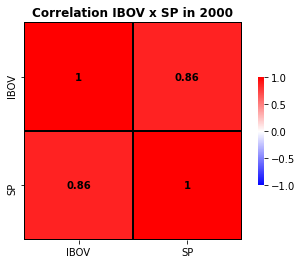

In [ ]:
# Now, let's define a year to our analysis. The available data during the election's are:
# 1996, 2000, 2004, 2008, 2012, 2016, 2020

# We start our analysis in 2000
year = '2000';
plot_data(year)


Em 2000, tivemos uma relativamente alta correlação entre a bolsa brasileira e a bolsa americana (0.86), o que significa que nesse período pré e pós eleição as duas bolsas caminharam parecidas em tendência (quando o S&P subiu, a IBOV subiu). Ambas as bolsa vinham performando bem até meados de setembro, onde as duas bolsas recuaram (pior para a IBOV). O S&P esboçou uma reação até o dia da eleição mas até o final do ano continuou sem recuperar os números atingidos no começo de setembro, enquanto a IBOV, embora também não tenha retornado aos valores anteriores, terminou o ano em uma melhor tendência. 


[*********************100%***********************]  2 of 2 completed


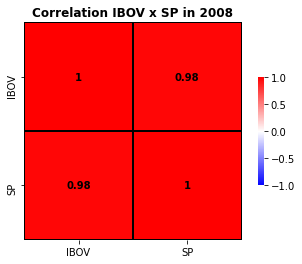

In [ ]:
# Now, let's study the 2008 ellection
year = '2008';
plot_data(year)

Em 2008, a correlação entre o S&P e a IBOV foi praticamente 1, ou seja, as duas bolsas subiram e caíram praticamente nos mesmos dias. Novamente, uma tendência similar ao ano de 2000 aconteceu. Contudo, em 2008, as bolsas começaram a cair no começo de outubro, em torno de 15 dias mais tarde do que em 2000. Até o dia das eleições as bolsas deram uma respirada mas novamente terminaram o ano abaixo dos valores de outubro.



[*********************100%***********************]  2 of 2 completed


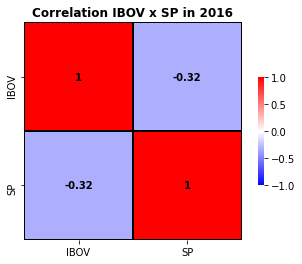

In [ ]:
# Finally, let's look at the 2016 ellection:
year = '2016';
plot_data(year)

Diferentemente das últimas duas eleições analisadas, em 2016 a correlação entre o S&P e a IBOV foi negativa: As bolsas performaram em tendências opostas. O S&P teve uma queda forte próximo ao dia da eleição mas teve uma recuperação considerável após a confirmação da vitória de Trump. A IBOV, contudo, teve uma forte alta até proxima ao dia da eleição e uma queda forte logo após a confirmação dos votos. A bolsa brasileira até tentou recuperar no final de dezembro mas caiu forte novamente até o meio de dezembro, onde voltou a se recuperar perto do final do ano.


# Conclusão

Com bases nesses dados, vemos que embora o S&P mostre uma janela de vendas no começo de setembro, a bolsa brasileira pode apresentar surpresas em relação ao exterior. Mesmo que em 2000 e 2008 as bolsas tenham performado perto de uma correlação de 1, em 2016 o oposto ocorreu, e os investidores que optaram por vender seus ativos em setembro, perderam uma pernada de alta até bem próximo das eleições. 

É importante pontuar, contudo, que isso não quer dizer nada em relação às eleições deste ano, mesmo que nas últimas semanas a correlação entre o S&P e a IBOV estejam negativas (rode o codigo acima para o ano de 2020!), se aproximando do caso de 2016. Esse ano tem sido um ano muito atípico, com a pandemia do COVID, onde as bolsas tiveram uma forte queda em março seguida de uma rápida recuperação onde o S&P já atinge máxima histórica e a IBOV continua travada entre 98 e 105 mil pontos, valores abaixo de antes da pandemia.      
